In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

2025-02-13 12:39:12.831009: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-13 12:39:12.831563: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-13 12:39:12.835242: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-13 12:39:12.846730: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739446752.866428   56926 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739446752.87

In [3]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [4]:
train_images[1].shape

(32, 32, 3)

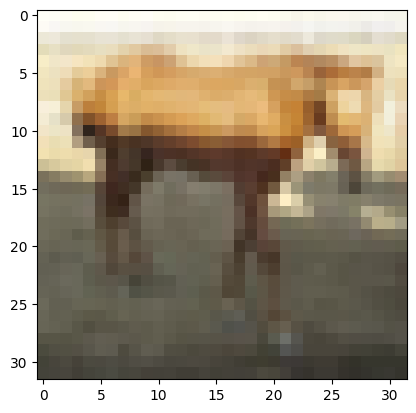

In [9]:
plt.imshow(train_images[2000])

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [28]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,898 (554.29 KB)

 Trainable params: 141,898 (554.29 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=6, batch_size=2**11, 
                    validation_data=(test_images, test_labels))

Epoch 1/6
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 556ms/step - accuracy: 0.1200 - loss: 2.2874 - val_accuracy: 0.1855 - val_loss: 2.1505
Epoch 2/6
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 560ms/step - accuracy: 0.2117 - loss: 2.0862 - val_accuracy: 0.3449 - val_loss: 1.7981
Epoch 3/6
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 594ms/step - accuracy: 0.3619 - loss: 1.7431 - val_accuracy: 0.3989 - val_loss: 1.6349
Epoch 4/6
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 564ms/step - accuracy: 0.4179 - loss: 1.6021 - val_accuracy: 0.4420 - val_loss: 1.5258
Epoch 5/6
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 564ms/step - accuracy: 0.4615 - loss: 1.4910 - val_accuracy: 0.4814 - val_loss: 1.4457
Epoch 6/6
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 561ms/step - accuracy: 0.5026 - loss: 1.3813 - val_accuracy: 0.4991 - val_loss: 1.3774


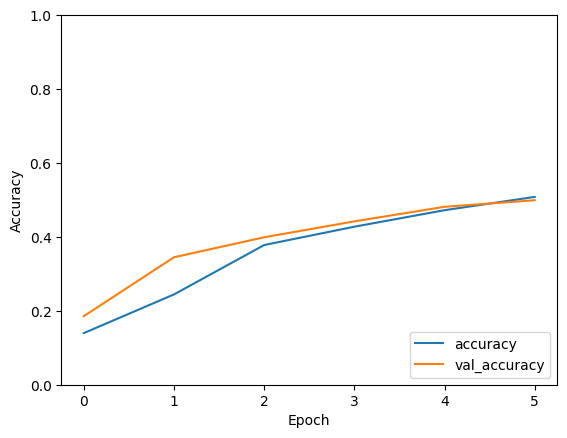

In [31]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

#test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [33]:
fc_model = models.Sequential()
fc_model.add(layers.Flatten(input_shape=(32, 32, 3)))
fc_model.add(layers.Dense(64, activation='relu'))
fc_model.add(layers.Dense(256, activation='relu'))
fc_model.add(layers.Dense(128, activation='relu'))
fc_model.add(layers.Dense(10))
fc_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │       196,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,498 (966.79 KB)

 Trainable params: 247,498 (966.79 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
fc_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = fc_model.fit(train_images, train_labels, epochs=19, batch_size=2**11,
                       validation_data=(test_images, test_labels))

Epoch 1/19
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.1018 - loss: 60.7497 - val_accuracy: 0.1001 - val_loss: 2.3026
Epoch 2/19
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1006 - loss: 2.3038 - val_accuracy: 0.0999 - val_loss: 2.3026
Epoch 3/19
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0996 - loss: 2.3028 - val_accuracy: 0.0999 - val_loss: 2.3025
Epoch 4/19
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0986 - loss: 2.3027 - val_accuracy: 0.0999 - val_loss: 2.3025
Epoch 5/19
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.1003 - loss: 2.3026 - val_accuracy: 0.0999 - val_loss: 2.3026
Epoch 6/19
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0980 - loss: 2.3025 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/19
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.1002 - loss: 2.3025 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/19
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0988 - loss: 2.3025 - val_accuracy: 0.0999 - 

KeyboardInterrupt: 

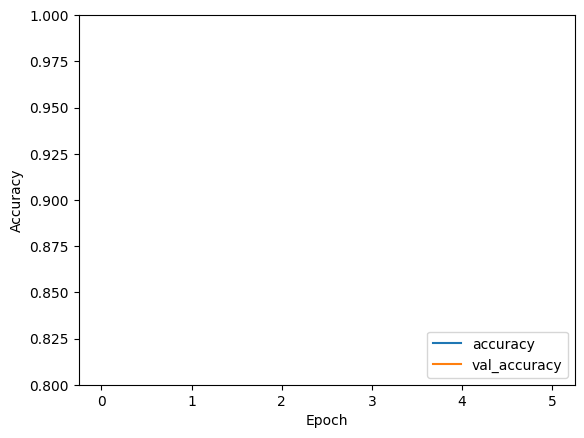

In [35]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')